# Luxury loan portfolio Monovariable analysis

In [ ]:
%run data_addition.py

## loading data in a dataframe
The data hace various columns that will not be used in the training like ids, duplicates as interest rate percent, names (first name,  middlename, lastname) and addresses

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/LuxuryLoanPortfolio.csv')
df.drop(['loan_id','interest rate percent','firstname','middlename','lastname','ADDRESS 1','ADDRESS 2','CITY','ZIP CODE','STATE','phone','social'],axis=1,inplace=True)
df.sort_values(by='funded_date')

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,home,Sales Manager,13,04 TAX CLASS 1 CONDOS,1C,R6,1,0,0,1
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,home,VP Sales,16,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0,0,2
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,home,Partner,10,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,-,-,2
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,home,EXECUTIVE VICE PRESIDENT,11,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,-,-,2
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,investment property,general manager,15,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,1469,2900,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,investment property,President,16,04 TAX CLASS 1 CONDOS,1C,R6,1,0,0,1
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,investment property,Account Manager,1,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,2600,3280,2
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,investment property,Director of Accounting,5,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0,0,2
913,1540000.0,2019-12-27,30,360,1.88,0.03478,6896.39,0,1540000.00,1600250.0,home,vp,18,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0,0,2


## Data info
the first look for identify and recognize the estadistics for a next analysis. the amount of data is 1.678

In [46]:
df.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,TAX CLASS AT TIME OF SALE
count,1.678000e+03,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,1.678000e+03,1.678000e+03,1678.000000,1678.000000,1678.000000
mean,1.848830e+06,27.362932,328.355185,2.255025,0.038004,9630.000787,47.147795,1.412786e+06,2.012219e+06,9.318832,2.736591,1.870083
std,3.953120e+06,5.616759,67.401114,0.439442,0.004500,24811.073341,28.375068,3.589084e+06,3.951243e+06,5.095769,4.355791,0.670388
min,4.400000e+05,10.000000,120.000000,1.370000,0.026480,1900.780000,0.000000,1.978503e+05,4.732000e+05,1.000000,0.000000,1.000000
25%,1.088750e+06,30.000000,360.000000,1.880000,0.034465,5256.095000,22.000000,7.343423e+05,1.229188e+06,5.000000,1.000000,2.000000
50%,1.490000e+06,30.000000,360.000000,2.240000,0.037875,7356.725000,47.000000,1.102861e+06,1.653925e+06,9.000000,1.000000,2.000000
75%,1.848000e+06,30.000000,360.000000,2.600000,0.041450,9755.227500,72.000000,1.487449e+06,2.035638e+06,14.000000,4.000000,2.000000
max,1.560000e+08,30.000000,360.000000,3.230000,0.048280,981383.990000,96.000000,1.432420e+08,1.560209e+08,18.000000,72.000000,4.000000


In [47]:
df.describe(include=object)

,funded_date,purpose,title,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,LAND SQUARE FEET,GROSS SQUARE FEET
count,1678,1678,1666,1678,1678,1678,1678,1678
unique,1256,5,870,24,8,46,202,294
top,2019-11-19,investment property,Owner,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,R1,0,0
freq,6,536,52,466,482,466,774,776


In [48]:
df['GROSS SQUARE FEET'].describe()

count     1678
unique     294
top          0
freq       776
Name: GROSS SQUARE FEET, dtype: object

In [49]:
df['funded_date'].sort_values()

1585    2012-01-01
172     2012-01-02
522     2012-01-02
716     2012-01-03
1607    2012-01-04
           ...    
1126    2019-12-21
1304    2019-12-25
1014    2019-12-26
913     2019-12-27
1451    2019-12-27
Name: funded_date, Length: 1678, dtype: object

## Elimantion of null data
All columns have not null data except title, that represent less than the 0.1% which is correct from my perspective delete those spaces. But, for be more precise in the process of a posible imputation will take a close view of this data column

In [50]:
df.isnull().sum()

funded_amount                        0
funded_date                          0
duration years                       0
duration months                      0
10 yr treasury index date funded     0
interest rate                        0
payments                             0
total past payments                  0
loan balance                         0
property value                       0
purpose                              0
title                               12
employment length                    0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BUILDING CLASS AT PRESENT            0
TOTAL UNITS                          0
LAND SQUARE FEET                     0
GROSS SQUARE FEET                    0
TAX CLASS AT TIME OF SALE            0
dtype: int64

As we can see the title refers about the professional title that those loan propert have, that in some cases doesn't being fill. Then, delete will not consider afect the stadistical result

In [51]:
df['title']

0       Vice President Global Field Services
1                    Senior program manager 
2                                        NaN
3                              Vice presiden
4                             Bank examiner 
                        ...                 
1673                         franchise owner
1674                 Chief Operating Officer
1675                         Owner/physician
1676                          General Manger
1677         Vice President, Capital Markets
Name: title, Length: 1678, dtype: object

In [52]:
df.dropna(how = 'any',inplace=True)
df.drop_duplicates(inplace=True)
df.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,TAX CLASS AT TIME OF SALE
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1.666000e+03,1.666000e+03,1666.000000,1666.000000,1666.000000
mean,1.850064e+06,27.376951,328.523409,2.253780,0.037994,9631.673896,47.196279,1.413712e+06,2.013568e+06,9.312125,2.733493,1.872149
std,3.966302e+06,5.606585,67.279024,0.439429,0.004502,24893.251320,28.390275,3.601223e+06,3.964418e+06,5.094995,4.355223,0.671052
min,4.400000e+05,10.000000,120.000000,1.370000,0.026480,1900.780000,0.000000,1.978503e+05,4.732000e+05,1.000000,0.000000,1.000000
25%,1.085500e+06,30.000000,360.000000,1.880000,0.034390,5242.837500,22.000000,7.343423e+05,1.228062e+06,5.000000,1.000000,2.000000
50%,1.490000e+06,30.000000,360.000000,2.240000,0.037870,7356.725000,47.000000,1.104020e+06,1.655800e+06,9.000000,1.000000,2.000000
75%,1.849500e+06,30.000000,360.000000,2.600000,0.041435,9761.992500,72.000000,1.487449e+06,2.035950e+06,14.000000,4.000000,2.000000
max,1.560000e+08,30.000000,360.000000,3.230000,0.048280,981383.990000,96.000000,1.432420e+08,1.560209e+08,18.000000,72.000000,4.000000


## Inspection for single variable

### Summary of the inspection

<Axes: xlabel='10 yr treasury index date funded', ylabel='Count'>

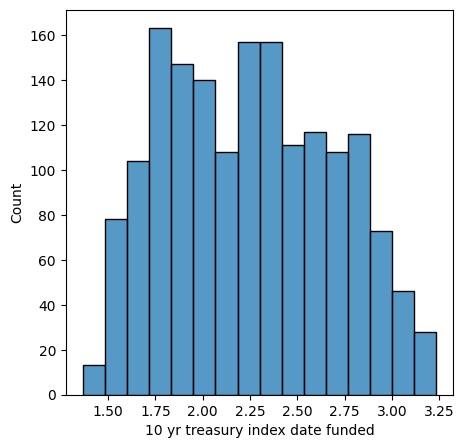

In [53]:
plt.figure(figsize =(5,5))
sns.histplot(data = df,x = '10 yr treasury index date funded')

In [54]:
outlyers_h_75 = df['loan balance']>3500000
outlyers = df['loan balance']
outlyers = outlyers[outlyers_h_75]
outlyers.describe()

count    8.800000e+01
mean     5.882933e+06
std      1.482749e+07
min      3.515081e+06
25%      3.779626e+06
50%      4.162470e+06
75%      4.631883e+06
max      1.432420e+08
Name: loan balance, dtype: float64

In [55]:
loan_minor_q4 = df['loan balance']<3500000
loan = df['loan balance']
loan = df[loan_minor_q4]
loan.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,TAX CLASS AT TIME OF SALE
count,1.578000e+03,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1.578000e+03,1.578000e+03,1578.000000,1578.000000,1578.000000
mean,1.573073e+06,27.357414,328.288973,2.249708,0.037952,8089.954968,48.255387,1.164477e+06,1.738010e+06,9.302281,2.720532,1.858048
std,9.004410e+05,5.629685,67.556220,0.434574,0.004445,5466.344996,28.347156,6.219452e+05,9.116372e+05,5.093471,4.340731,0.672969
min,4.400000e+05,10.000000,120.000000,1.370000,0.027680,1900.780000,0.000000,1.978503e+05,4.732000e+05,1.000000,0.000000,1.000000
25%,1.002375e+06,30.000000,360.000000,1.880000,0.034480,5118.220000,23.000000,7.122941e+05,1.194225e+06,5.000000,1.000000,1.000000
50%,1.460000e+06,30.000000,360.000000,2.238750,0.037795,7145.870000,49.000000,1.071023e+06,1.613250e+06,9.000000,1.000000,2.000000
75%,1.790000e+06,30.000000,360.000000,2.590000,0.041388,9024.682500,73.000000,1.404093e+06,1.959775e+06,14.000000,4.000000,2.000000
max,1.050800e+07,30.000000,360.000000,3.230000,0.048280,105486.810000,96.000000,3.482132e+06,1.080030e+07,18.000000,72.000000,4.000000


<Axes: xlabel='loan balance', ylabel='Count'>

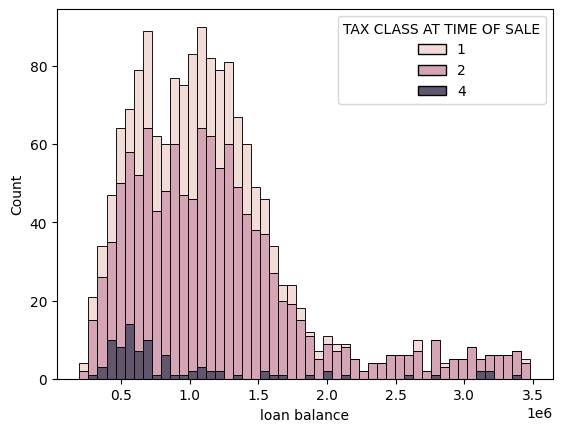

In [56]:
sns.histplot(data = loan,x = 'loan balance',hue = 'TAX CLASS AT TIME OF SALE',bins = 50,multiple='stack')

<Axes: xlabel='loan balance'>

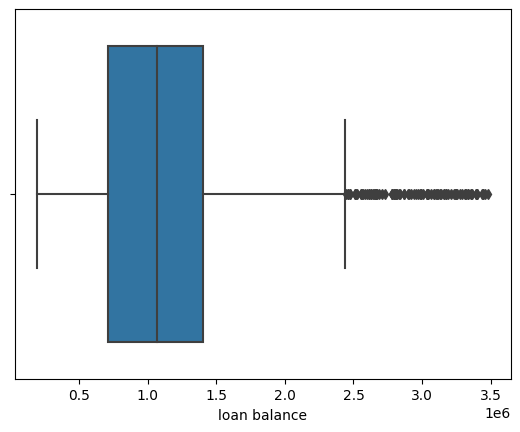

In [57]:
sns.boxplot(data = loan, x = 'loan balance')

<Axes: xlabel='10 yr treasury index date funded', ylabel='Count'>

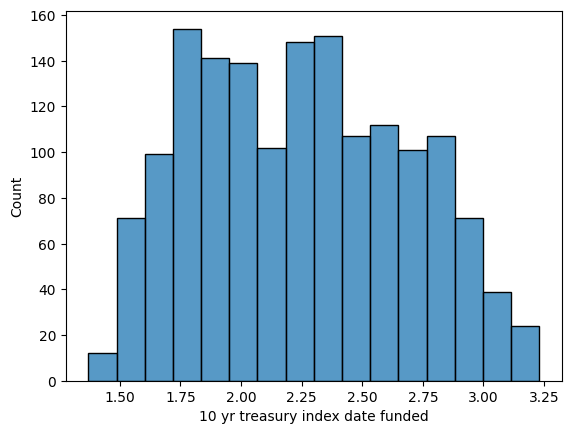

In [58]:
sns.histplot(data=loan, x = '10 yr treasury index date funded')


<Axes: xlabel='interest rate', ylabel='Count'>

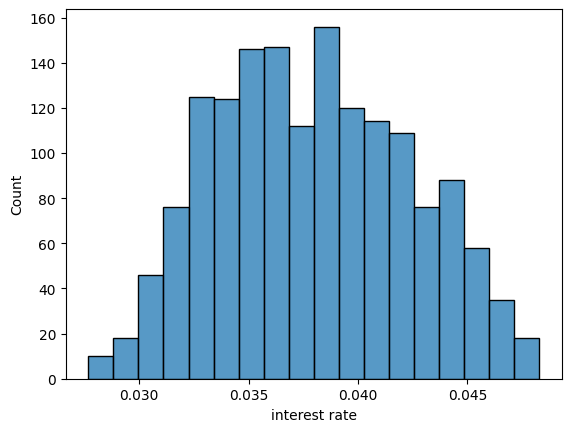

In [59]:
sns.histplot(data= loan, x = 'interest rate')

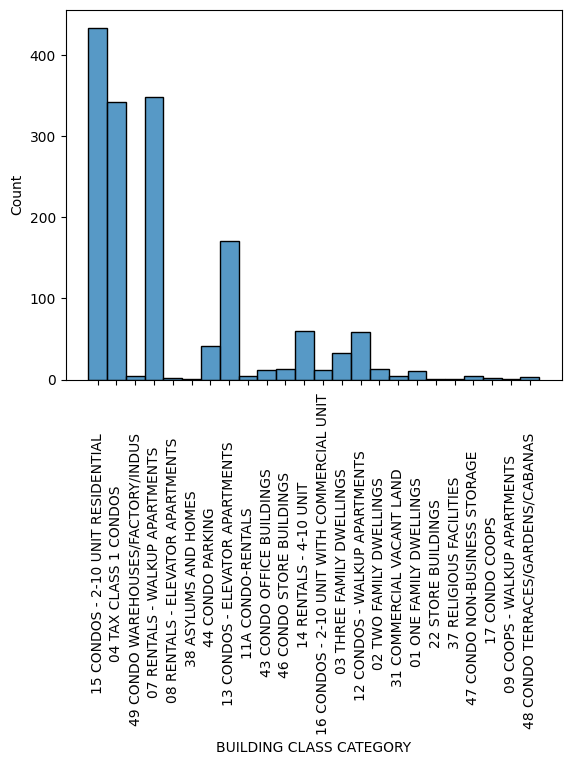

In [60]:
sns.histplot(data=loan,x='BUILDING CLASS CATEGORY')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='payments', ylabel='Count'>

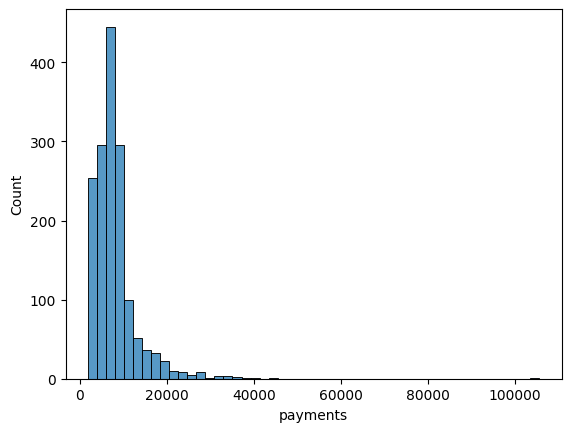

In [61]:
sns.histplot(data= loan, x = 'payments',bins=50)

In [62]:
import re 
message = '-'
dash = re.compile(r'-+?')
i = dash.search(message)
(i.group()=='-')

True

In [63]:
df_processed = loan.copy()
df_processed_by_date = df_processed.sort_values(by= 'funded_date')

In [64]:
df_processed_by_date = df_processed_by_date.copy()
df_processed_by_date['GROSS SQUARE FEET'] = pd.to_numeric(df_processed['GROSS SQUARE FEET'],errors='coerce')
df_processed_by_date['LAND SQUARE FEET'] = pd.to_numeric(df_processed['LAND SQUARE FEET'],errors='coerce')
df_processed_by_date

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,home,Sales Manager,13,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,home,VP Sales,16,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,home,Partner,10,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,NaN,NaN,2
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,home,EXECUTIVE VICE PRESIDENT,11,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,NaN,NaN,2
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,investment property,general manager,15,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,1469.0,2900.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,investment property,President,16,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,investment property,Account Manager,1,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,2600.0,3280.0,2
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,investment property,Director of Accounting,5,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
1451,920000.0,2019-12-27,30,360,1.88,0.03479,4120.43,0,920000.00,920250.0,commerical property,Executive Director,5,07 RENTALS - WALKUP APARTMENTS,2B,C1,9,3124.0,4620.0,2


In [65]:
df_processed_by_date['GROSS SQUARE FEET']=df_processed_by_date['GROSS SQUARE FEET'].fillna(0)
df_processed_by_date['LAND SQUARE FEET']=df_processed_by_date['LAND SQUARE FEET'].fillna(0)
df_processed_by_date

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,home,Sales Manager,13,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,home,VP Sales,16,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,home,Partner,10,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,home,EXECUTIVE VICE PRESIDENT,11,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,investment property,general manager,15,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,1469.0,2900.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,investment property,President,16,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,investment property,Account Manager,1,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,2600.0,3280.0,2
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,investment property,Director of Accounting,5,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
1451,920000.0,2019-12-27,30,360,1.88,0.03479,4120.43,0,920000.00,920250.0,commerical property,Executive Director,5,07 RENTALS - WALKUP APARTMENTS,2B,C1,9,3124.0,4620.0,2


In [66]:
df_processed_by_date.isna().sum()

funded_amount                       0
funded_date                         0
duration years                      0
duration months                     0
10 yr treasury index date funded    0
interest rate                       0
payments                            0
total past payments                 0
loan balance                        0
property value                      0
purpose                             0
title                               0
employment length                   0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT                0
BUILDING CLASS AT PRESENT           0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
TAX CLASS AT TIME OF SALE           0
dtype: int64

In [67]:
df_processed.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,TOTAL UNITS,TAX CLASS AT TIME OF SALE
count,1.578000e+03,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1.578000e+03,1.578000e+03,1578.000000,1578.000000,1578.000000
mean,1.573073e+06,27.357414,328.288973,2.249708,0.037952,8089.954968,48.255387,1.164477e+06,1.738010e+06,9.302281,2.720532,1.858048
std,9.004410e+05,5.629685,67.556220,0.434574,0.004445,5466.344996,28.347156,6.219452e+05,9.116372e+05,5.093471,4.340731,0.672969
min,4.400000e+05,10.000000,120.000000,1.370000,0.027680,1900.780000,0.000000,1.978503e+05,4.732000e+05,1.000000,0.000000,1.000000
25%,1.002375e+06,30.000000,360.000000,1.880000,0.034480,5118.220000,23.000000,7.122941e+05,1.194225e+06,5.000000,1.000000,1.000000
50%,1.460000e+06,30.000000,360.000000,2.238750,0.037795,7145.870000,49.000000,1.071023e+06,1.613250e+06,9.000000,1.000000,2.000000
75%,1.790000e+06,30.000000,360.000000,2.590000,0.041388,9024.682500,73.000000,1.404093e+06,1.959775e+06,14.000000,4.000000,2.000000
max,1.050800e+07,30.000000,360.000000,3.230000,0.048280,105486.810000,96.000000,3.482132e+06,1.080030e+07,18.000000,72.000000,4.000000


In [68]:
df_processed_by_date.drop_duplicates()

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,home,Sales Manager,13,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,home,VP Sales,16,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,home,Partner,10,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,home,EXECUTIVE VICE PRESIDENT,11,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,investment property,general manager,15,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,1469.0,2900.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,investment property,President,16,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,investment property,Account Manager,1,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,2600.0,3280.0,2
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,investment property,Director of Accounting,5,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
1451,920000.0,2019-12-27,30,360,1.88,0.03479,4120.43,0,920000.00,920250.0,commerical property,Executive Director,5,07 RENTALS - WALKUP APARTMENTS,2B,C1,9,3124.0,4620.0,2


In [69]:
df_processed_by_date.isnull().sum()

funded_amount                       0
funded_date                         0
duration years                      0
duration months                     0
10 yr treasury index date funded    0
interest rate                       0
payments                            0
total past payments                 0
loan balance                        0
property value                      0
purpose                             0
title                               0
employment length                   0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT                0
BUILDING CLASS AT PRESENT           0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
TAX CLASS AT TIME OF SALE           0
dtype: int64

In [70]:
df_processed_by_date['purpose'].describe()

count     1578
unique       5
top       home
freq       512
Name: purpose, dtype: object

In [71]:
df_purpose=pd.get_dummies(df_processed_by_date['purpose'],dummy_na=False,dtype=float)
df_purpose

,boat,commerical property,home,investment property,plane
1585,0.0,0.0,1.0,0.0,0.0
172,0.0,0.0,1.0,0.0,0.0
522,0.0,0.0,1.0,0.0,0.0
716,0.0,0.0,1.0,0.0,0.0
1607,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1126,0.0,0.0,0.0,1.0,0.0
1304,0.0,0.0,0.0,1.0,0.0
1014,0.0,0.0,0.0,1.0,0.0
1451,0.0,1.0,0.0,0.0,0.0


[]

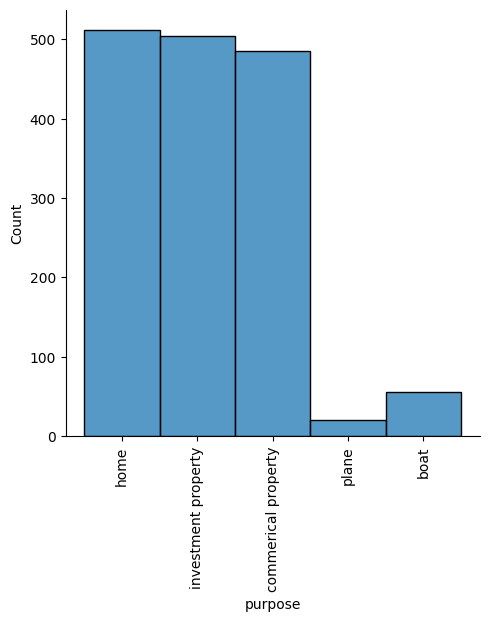

In [72]:
sns.displot(data = df_processed_by_date,x = 'purpose')
plt.xticks(rotation = 90)
plt.plot()

In [73]:
df_tax_class=pd.get_dummies(df_processed_by_date['TAX CLASS AT PRESENT'],dummy_na=False,dtype=float)
df_tax_class

,1,1A,1C,2,2A,2B,2C,4
1585,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
172,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
522,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
716,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1607,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1304,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1014,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1451,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


[]

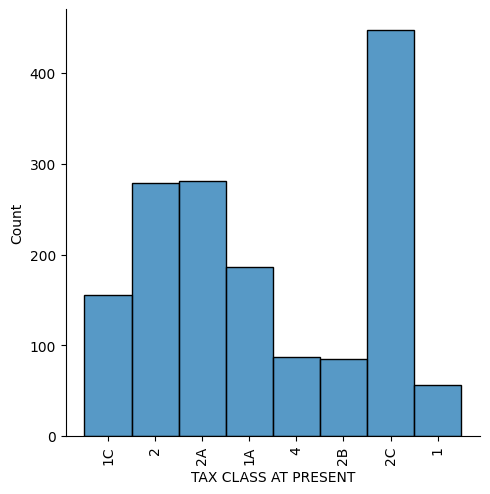

In [74]:
sns.displot(data = df_processed_by_date,x = 'TAX CLASS AT PRESENT')
plt.xticks(rotation = 90)
plt.plot()

[]

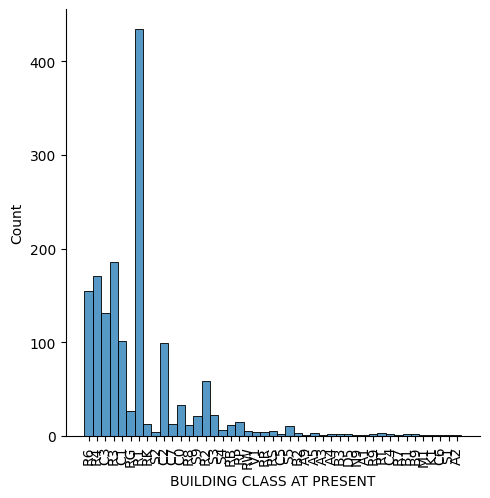

In [75]:
sns.displot(data = df_processed_by_date,x = 'BUILDING CLASS AT PRESENT')
plt.xticks(rotation = 90)
plt.plot()

In [76]:
df_final = df_processed_by_date.copy()

df_final

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,purpose,title,employment length,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,home,Sales Manager,13,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,home,VP Sales,16,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,home,Partner,10,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,home,EXECUTIVE VICE PRESIDENT,11,13 CONDOS - ELEVATOR APARTMENTS,2,R4,1,0.0,0.0,2
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,investment property,general manager,15,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,1469.0,2900.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,investment property,President,16,04 TAX CLASS 1 CONDOS,1C,R6,1,0.0,0.0,1
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,investment property,Account Manager,1,07 RENTALS - WALKUP APARTMENTS,2A,C3,4,2600.0,3280.0,2
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,investment property,Director of Accounting,5,12 CONDOS - WALKUP APARTMENTS,2,R2,1,0.0,0.0,2
1451,920000.0,2019-12-27,30,360,1.88,0.03479,4120.43,0,920000.00,920250.0,commerical property,Executive Director,5,07 RENTALS - WALKUP APARTMENTS,2B,C1,9,3124.0,4620.0,2


In [77]:
df_final = pd.concat([df_final,df_purpose],axis=1)
df_final.isna().sum()

funded_amount                       0
funded_date                         0
duration years                      0
duration months                     0
10 yr treasury index date funded    0
interest rate                       0
payments                            0
total past payments                 0
loan balance                        0
property value                      0
purpose                             0
title                               0
employment length                   0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT                0
BUILDING CLASS AT PRESENT           0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
TAX CLASS AT TIME OF SALE           0
boat                                0
commerical property                 0
home                                0
investment property                 0
plane                               0
dtype: int64

In [78]:
df_final = pd.concat([df_final,df_tax_class],axis=1)
df_final

,funded_amount,funded_date,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,...,investment property,plane,1,1A,1C,2,2A,2B,2C,4
1585,468000.0,2012-01-01,30,360,1.89,0.03490,2098.92,96,266503.91,734100.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
172,4191000.0,2012-01-02,30,360,1.89,0.03486,18786.73,95,2406261.05,4337050.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
522,1690000.0,2012-01-02,30,360,1.89,0.03488,7577.54,95,970133.77,1956050.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
716,1560000.0,2012-01-03,30,360,1.97,0.03568,7064.45,95,888877.63,1766000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1607,560000.0,2012-01-04,30,360,2.00,0.03599,2545.70,95,318158.57,705950.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,1270000.0,2019-12-21,15,180,1.92,0.03219,8904.77,0,1270000.00,1390550.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1304,1120000.0,2019-12-25,30,360,1.90,0.03499,5028.68,0,1120000.00,1120350.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1014,1330000.0,2019-12-26,30,360,1.90,0.03499,5971.55,0,1330000.00,1510300.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1451,920000.0,2019-12-27,30,360,1.88,0.03479,4120.43,0,920000.00,920250.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
df_final.describe()

,funded_amount,duration years,duration months,10 yr treasury index date funded,interest rate,payments,total past payments,loan balance,property value,employment length,...,investment property,plane,1,1A,1C,2,2A,2B,2C,4
count,1.578000e+03,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1.578000e+03,1.578000e+03,1578.000000,...,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000,1578.000000
mean,1.573073e+06,27.357414,328.288973,2.249708,0.037952,8089.954968,48.255387,1.164477e+06,1.738010e+06,9.302281,...,0.319392,0.013308,0.035488,0.117871,0.098859,0.176806,0.178074,0.053866,0.283904,0.055133
std,9.004410e+05,5.629685,67.556220,0.434574,0.004445,5466.344996,28.347156,6.219452e+05,9.116372e+05,5.093471,...,0.466389,0.114626,0.185068,0.322557,0.298568,0.381625,0.382696,0.225824,0.451034,0.228312
min,4.400000e+05,10.000000,120.000000,1.370000,0.027680,1900.780000,0.000000,1.978503e+05,4.732000e+05,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.002375e+06,30.000000,360.000000,1.880000,0.034480,5118.220000,23.000000,7.122941e+05,1.194225e+06,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.460000e+06,30.000000,360.000000,2.238750,0.037795,7145.870000,49.000000,1.071023e+06,1.613250e+06,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.790000e+06,30.000000,360.000000,2.590000,0.041388,9024.682500,73.000000,1.404093e+06,1.959775e+06,14.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.050800e+07,30.000000,360.000000,3.230000,0.048280,105486.810000,96.000000,3.482132e+06,1.080030e+07,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


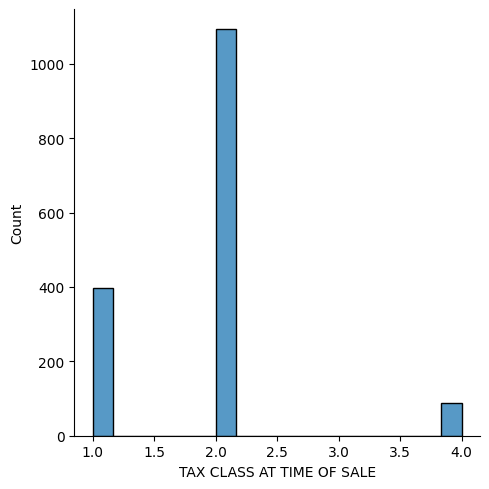

In [80]:
sns.displot(data = df_processed,x = 'TAX CLASS AT TIME OF SALE')

In [83]:
df_building_class=pd.get_dummies(df_processed_by_date['BUILDING CLASS AT PRESENT'],dummy_na=False,dtype=float)
df_building_class

,A1,A2,A3,A4,A5,A9,B1,B2,B3,B9,...,RS,RT,RW,S1,S2,S3,S4,S5,S9,V1
1585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1000x1000 with 0 Axes>

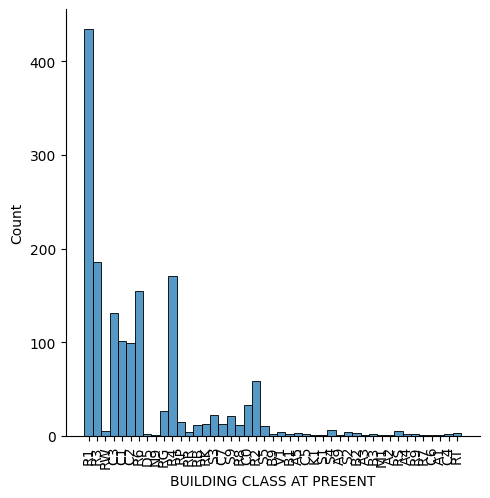

In [82]:
plt.figure(figsize=(10,10))
sns.displot(data=df_processed,x= 'BUILDING CLASS AT PRESENT')
plt.xticks(rotation=90)
plt.show()